In [ ]:
# Distribution classes
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os


# Add the current directory to path to import eda.py
sys.path.append(os.path.dirname(os.getcwd()))


# Set plotting style
plt.style.use('default')
sns.set_palette("Set2")

In [5]:
from data.dataloader import DataLoader
from config.config import CONFIG
#importlib.reload(DataLoader)

loader = DataLoader(CONFIG.data)
df = loader.load_data()


from data.preprocessing import DataPreprocessor
preprocessor = DataPreprocessor(CONFIG.data)
df = preprocessor.preprocess(df)

Target transformation applied: {0: 700, 1: 300}


In [ ]:
# get numerical features
num_features = CONFIG.data.num_features

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA (only numeric features)
X = df[num_features].copy()
y = df['credit_risk']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# PCA for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"Explained variance (2D): {pca_2d.explained_variance_ratio_.sum():.2%}")
print(f"Explained variance (3D): {pca_3d.explained_variance_ratio_.sum():.2%}")

Explained variance (2D): 51.52%
Explained variance (3D): 65.07%


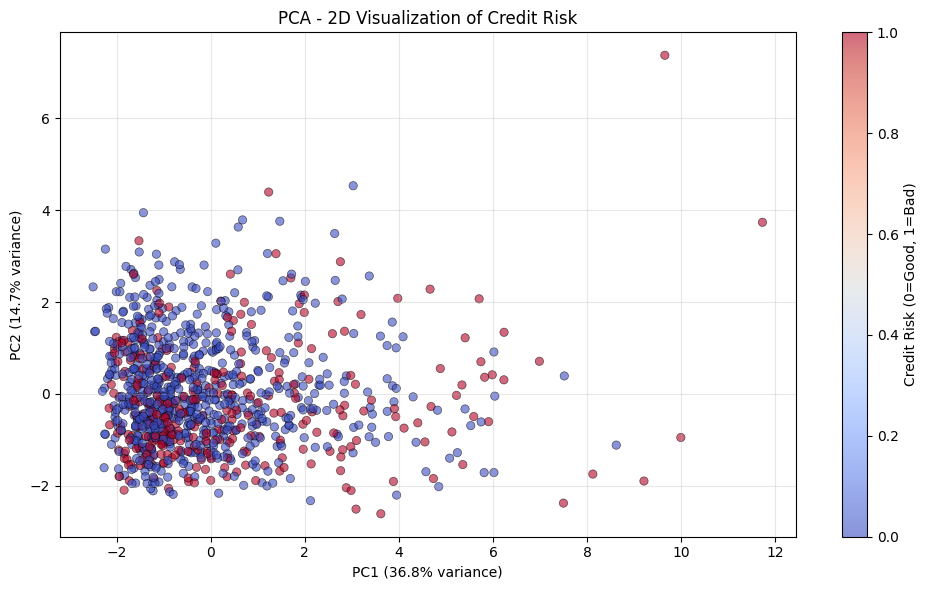

In [8]:
# 2D PCA Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolors='k', linewidth=0.5)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA - 2D Visualization of Credit Risk')
plt.colorbar(scatter, label='Credit Risk (0=Good, 1=Bad)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

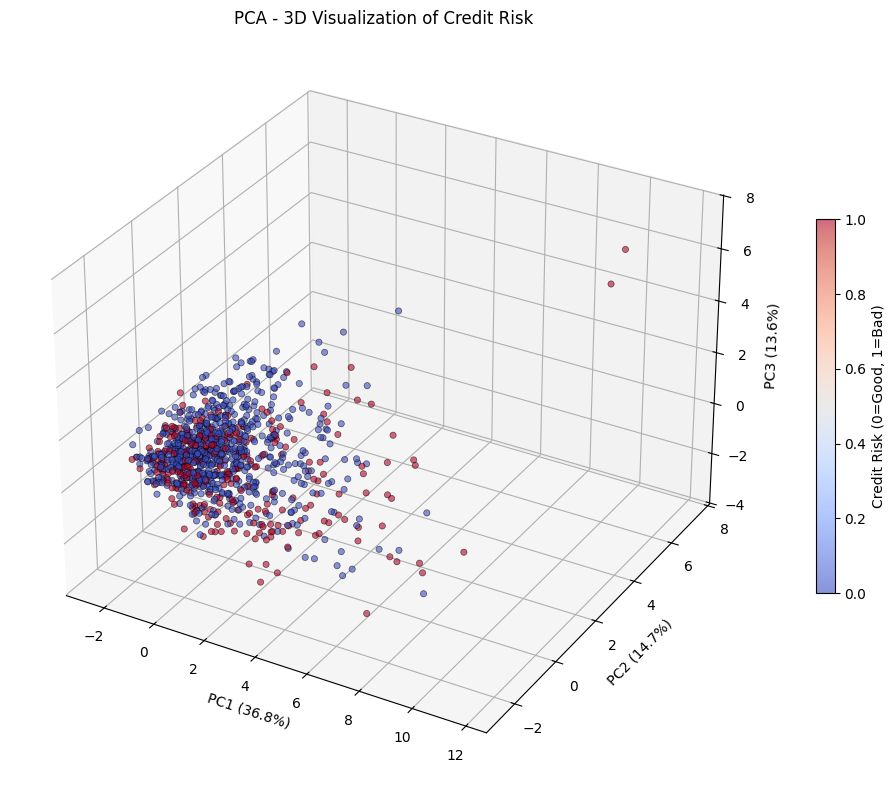

In [9]:
# 3D PCA Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=y, cmap='coolwarm', alpha=0.6, edgecolors='k', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax.set_title('PCA - 3D Visualization of Credit Risk')

plt.colorbar(scatter, label='Credit Risk (0=Good, 1=Bad)', shrink=0.5)
plt.tight_layout()
plt.show()